In [115]:
#Units Conversion
MeV = 1 
GeV = 1000*MeV
fm  = 1
c   = 1
metres = (10**15)*fm
km = 1000*metres
second = 2.99*(10**8)*metres
kg = (second**2)/((1.6*(10**(-13)))*((metres)**2))
G = 6.67*10**(-11)*((metres)**3)/(kg*(second)**2)
mbar = 1.66*(10**-27)*kg
import scipy
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plot

In [116]:
#Pc = 227.99999 
p1 = 0.053955053 
p2 = 0.797522989 
k1 = 1.8426632601064867 
GA1 = 3.88632843 
GA2 = 2.71342162
GA3 = 1.53107396
GA1_R = 1.58425 
GA2_R = 1.28733 
GA3_R = 0.62223
GA4_R = 1.35692 
k1_R = 2.8268581285298255e-16
k2_R = 5.063768639559009e-19
k3_R = 3.5610797610513604e-25
k4_R = 2.2297511225728095e-18 
P1_Read= 2.1445291264915162e-33
P2_Read= 5.332626487963225e-28
P3_Read = 1.7762371605771977e-27

In [117]:
def piecewise_polytrope_SFHx(p,p1,p2,k1,GA1,GA2,GA3):
    
    k2 = p1/((p1/k1)**(1/GA1) + p1/(GA1-1) - p1/(GA2-1))**GA2
    k3 = p2/((p2/k2)**(1/GA2) + p2/(GA2-1) - p2/(GA3-1))**GA3
                               
    condition1 = (p < p1) 
    condition2 = (p >= p1) & (p < p2)
    condition3 = (p >= p2) 
    
    condition = [condition1, condition2, condition3]
    Polytrope1 = lambda p: ((GeV*p/k1)**(1/GA1) + (p*GeV/(GA1-1)))/GeV
    Polytrope2 = lambda p: ((GeV*p/k2)**(1/GA2) + (p*GeV/(GA2-1)))/GeV
    Polytrope3 = lambda p: ((GeV*p/k3)**(1/GA3) + (p*GeV/(GA3-1)))/GeV
        
    function_list1 = [Polytrope1 , Polytrope2 , Polytrope3]
        
    d = (np.piecewise(p, condition, function_list1))
    return (d)


In [118]:
def piecewise_polytrope_4PPR(p,P1_Read,P2_Read,P3_Read,k1_R,k2_R,k3_R,k4_R,
                             GA1_R,GA2_R,GA3_R,GA4_R):
    condition1_Read = p < P1_Read
    condition2_Read = (p >= P1_Read) & (p < P2_Read)
    condition3_Read = (p >= P2_Read) & (p < P3_Read)
    condition4_Read = (p >= P3_Read) 
    
    condition_Read = [condition1_Read,condition2_Read,condition3_Read,condition4_Read]
        
    Polytrope1_Read = lambda p: ((GeV*p/k1_R)**(1/GA1_R) + (p*GeV/(GA1_R-1)))/GeV
    Polytrope2_Read = lambda p: ((GeV*p/k2_R)**(1/GA2_R) + (p*GeV/(GA2_R-1)))/GeV
    Polytrope3_Read = lambda p: ((GeV*p/k3_R)**(1/GA3_R) + (p*GeV/(GA3_R-1)))/GeV
    Polytrope4_Read = lambda p: ((GeV*p/k4_R)**(1/GA4_R) + (p*GeV/(GA4_R-1)))/GeV
    
    function_list2 = [Polytrope1_Read,Polytrope2_Read,Polytrope3_Read,Polytrope4_Read]
        
    d = (np.piecewise(p, condition_Read, function_list2))
    return (d)

In [119]:
def F(p):
    A = piecewise_polytrope_SFHx(p,p1,p2,k1,GA1,GA2,GA3)
    B = piecewise_polytrope_4PPR(p,P1_Read,P2_Read,P3_Read,k1_R,k2_R,k3_R,k4_R,
                             GA1_R,GA2_R,GA3_R,GA4_R)
    return np.abs(A-B)

root = optimize.newton(F,10**-6)
root

/tmp/ipykernel_22429/4263053185.py:11: RuntimeWarning: invalid value encountered in power
  Polytrope1 = lambda p: ((GeV*p/k1)**(1/GA1) + (p*GeV/(GA1-1)))/GeV
/tmp/ipykernel_22429/1187465762.py:10: RuntimeWarning: invalid value encountered in power
  Polytrope1_Read = lambda p: ((GeV*p/k1_R)**(1/GA1_R) + (p*GeV/(GA1_R-1)))/GeV


RuntimeError: Tolerance of nan reached. Failed to converge after 4 iterations, value is nan.

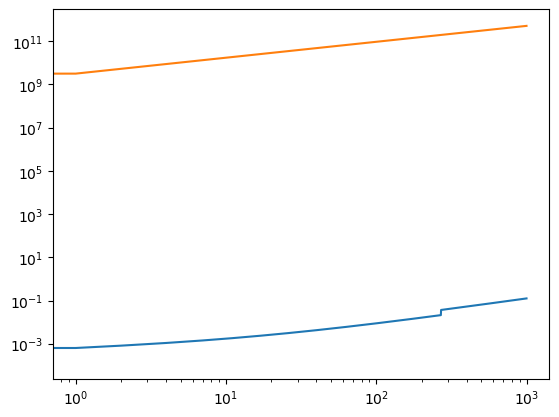

In [114]:
p = np.linspace(10**-6 ,0.2, 1000)
plot.xscale("log")
plot.yscale("log")
plot.plot(piecewise_polytrope_SFHx(p,p1,p2,k1,GA1,GA2,GA3))
plot.plot(piecewise_polytrope_4PPR(p,P1_Read,P2_Read,P3_Read,k1_R,k2_R,k3_R,k4_R,GA1_R,GA2_R,GA3_R,GA4_R))